# RSI（相对强弱指数）指标详解

本教程将详细介绍RSI指标的定义、计算方法、Python实现、可视化以及在量化分析中的应用。

## 1. RSI指标简介

RSI（Relative Strength Index, 相对强弱指数）是由J. Welles Wilder于1978年提出的动量指标，用于衡量股票或其他金融资产在一定时期内价格变动的速度和变化。RSI的取值范围为0到100，常用于判断超买或超卖状态。

- 通常RSI>70被认为超买，价格可能回调
- RSI<30被认为超卖，价格可能反弹

## 2. RSI的计算方法

RSI的计算分为以下几步：
1. 计算每一天的涨跌幅（收盘价的变化）
2. 分别计算N日内的平均上涨幅度（Average Gain）和平均下跌幅度（Average Loss）
3. 计算相对强弱（RS）：RS = 平均上涨幅度 / 平均下跌幅度
4. 计算RSI：RSI = 100 - 100 / (1 + RS)

常用的N值为14天。

In [19]:
# 伪随机
# 为了让别人可以复现你随机生成的数据/自己的代码每次运行结果一致----随机数种子

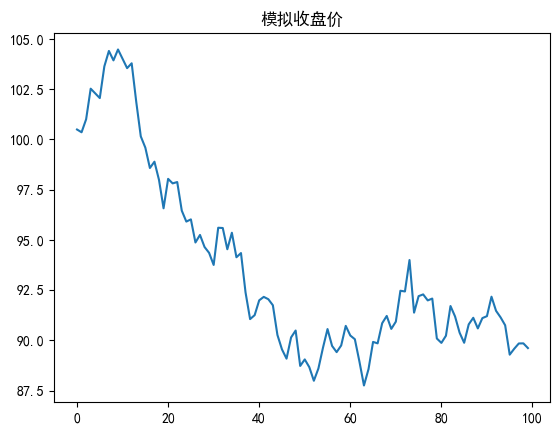

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 示例：生成一组模拟收盘价数据
np.random.seed(42)
close = pd.Series(100 + np.cumsum(np.random.randn(100)))
close.plot(title='模拟收盘价')
plt.show()

## 3. RSI的Python实现

下面我们用Python实现RSI的计算函数：

In [21]:
close

0     100.496714
1     100.358450
2     101.006138
3     102.529168
4     102.295015
         ...    
95     89.287646
96     89.583767
97     89.844822
98     89.849935
99     89.615348
Length: 100, dtype: float64

In [22]:
delta = close.diff()
delta

0          NaN
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
        ...   
95   -1.463515
96    0.296120
97    0.261055
98    0.005113
99   -0.234587
Length: 100, dtype: float64

In [23]:
(delta.where(delta > 0, 0))

0     0.000000
1     0.000000
2     0.647689
3     1.523030
4     0.000000
        ...   
95    0.000000
96    0.296120
97    0.261055
98    0.005113
99    0.000000
Length: 100, dtype: float64

In [24]:
(delta.where(delta > 0, 0)).rolling(window=2).mean()

0          NaN
1     0.000000
2     0.323844
3     1.085359
4     0.761515
        ...   
95    0.000000
96    0.148060
97    0.278588
98    0.133084
99    0.002557
Length: 100, dtype: float64

In [25]:
def func(param1, param2=14):
    # do somthing
    return param1+param2

print(func(1,1))

2


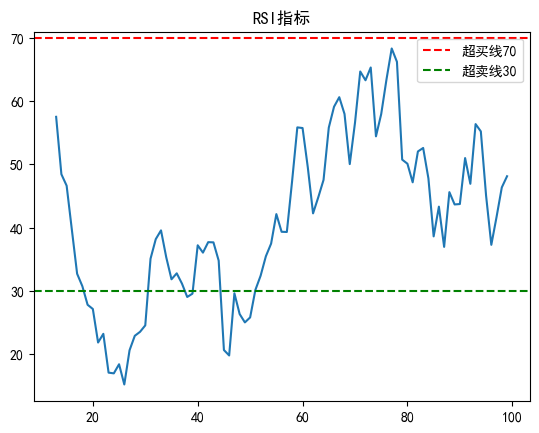

In [26]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - 100 / (1 + rs)
    return rsi

rsi = compute_rsi(close)
rsi.plot(title='RSI指标')
plt.axhline(70, color='r', linestyle='--', label='超买线70')
plt.axhline(30, color='g', linestyle='--', label='超卖线30')
plt.legend()
plt.show()

## 4. RSI在量化分析中的应用

RSI常用于判断市场的超买超卖状态，辅助交易决策。例如：
- 当RSI低于30时，考虑买入
- 当RSI高于70时，考虑卖出

下面以简单的策略为例：

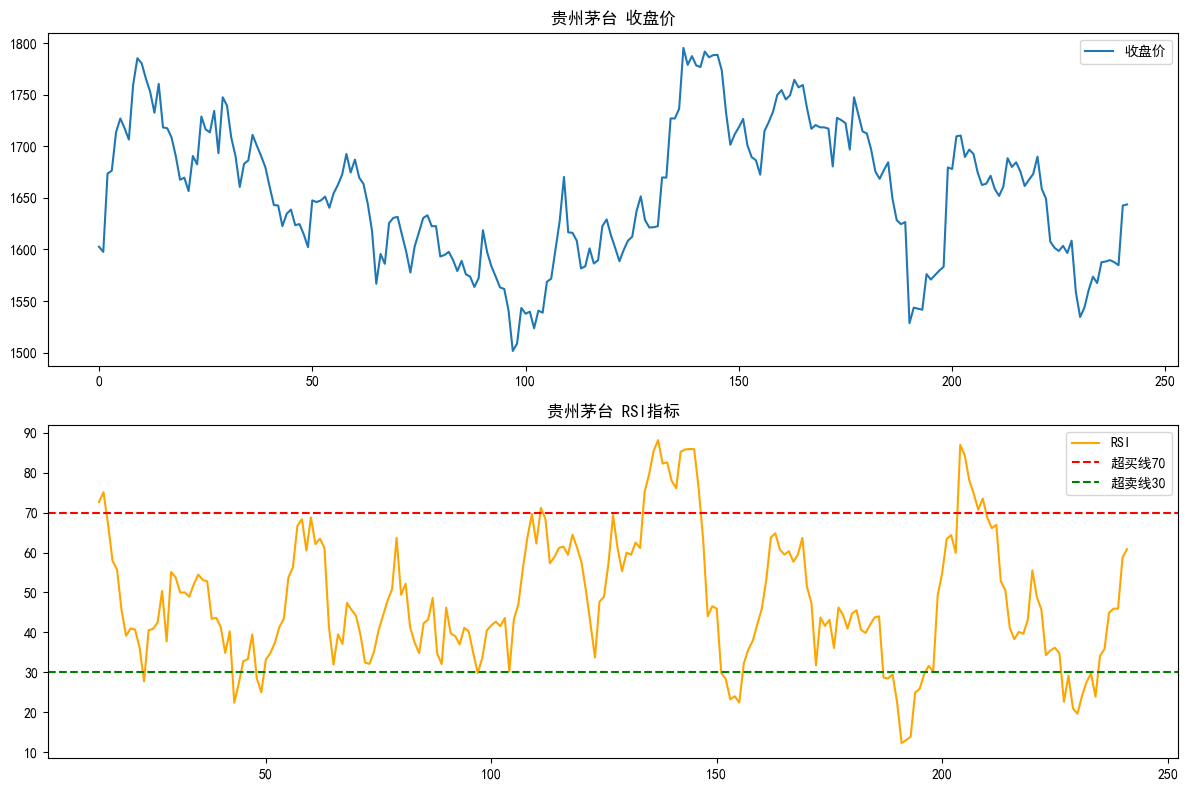

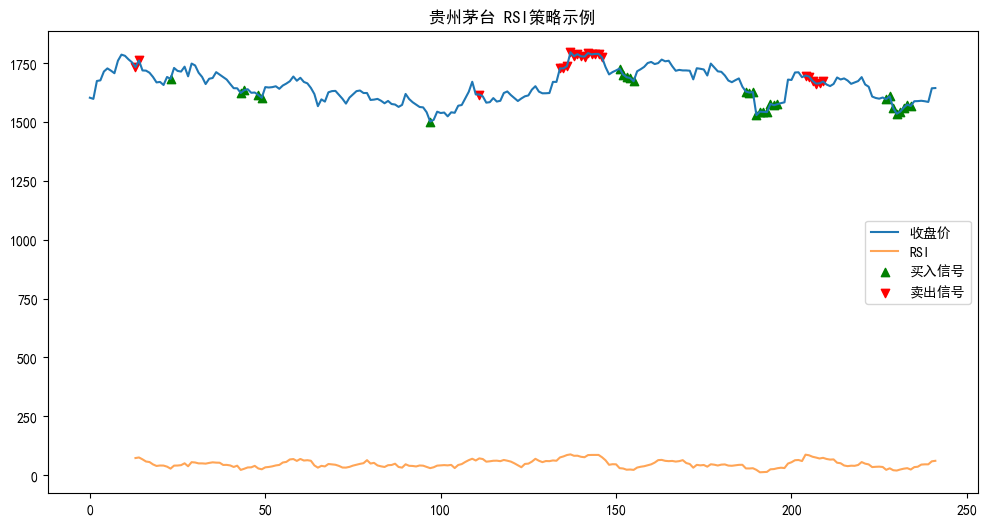

In [27]:
# 使用akshare获取真实股票数据，并可视化RSI的应用
import akshare as ak

# 以贵州茅台（600519.SH）为例，获取近一年的日K线数据
stock_df = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20230101", end_date="20231231", adjust="qfq")
close_real = stock_df['收盘']

# 计算RSI
rsi_real = compute_rsi(close_real)

# 可视化收盘价与RSI
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(close_real.index, close_real, label='收盘价')
plt.title('贵州茅台 收盘价')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rsi_real.index, rsi_real, label='RSI', color='orange')
plt.axhline(70, color='r', linestyle='--', label='超买线70')
plt.axhline(30, color='g', linestyle='--', label='超卖线30')
plt.title('贵州茅台 RSI指标')
plt.legend()

plt.tight_layout()
plt.show()

# 标注买入/卖出信号
buy_signal_real = (rsi_real < 30)
sell_signal_real = (rsi_real > 70)

plt.figure(figsize=(12,6))
plt.plot(close_real.index, close_real, label='收盘价')
plt.plot(rsi_real.index, rsi_real, label='RSI', alpha=0.7)
plt.scatter(rsi_real[buy_signal_real].index, close_real[buy_signal_real], marker='^', color='g', label='买入信号')
plt.scatter(rsi_real[sell_signal_real].index, close_real[sell_signal_real], marker='v', color='r', label='卖出信号')
plt.legend()
plt.title('贵州茅台 RSI策略示例')
plt.show()


## 5. 总结

- RSI是常用的动量指标，能有效辅助判断超买超卖
- 结合其他指标和基本面分析效果更佳
- 实际应用中应注意参数选择和信号过滤，避免单一指标盲目操作